In [1]:
import numpy as np
from flyeye.data.experiments import Experiment
from figures.dynamics import Expression    
from figures.comparison import DosingComparison
%matplotlib inline

# Load dosage experiment data

In [2]:
pnt1x = Experiment('../data/pntgfp_dosing/1xPntGFP/', normalization='blue')
pnt2x = Experiment('../data/pntgfp_dosing/2xPntGFP/', normalization='blue')

# Figure 4 A-D

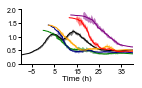

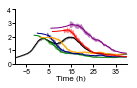

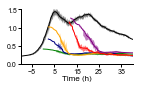

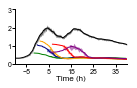

In [3]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig 4A (Pnt levels, 1x PntGFP)
fig4A = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 2), yticks=np.arange(0, 2.1, .5))
fig4A.render('green', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4B (Pnt levels, 2x PntGFP)
fig4B = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 4), yticks=np.arange(0, 4.1, 1.))
fig4B.render('green', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4C (Yan levels, 1x PntGFP)
fig4C = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 1.5), yticks=np.arange(0, 1.6, .5))
fig4C.render('red', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4D (Yan levels, 2x PntGFP)
fig4D = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 3), yticks=np.arange(0, 3.1, 1.))
fig4D.render('red', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Figure 4 E

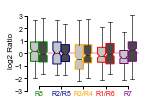

In [4]:
fig4E = DosingComparison.from_experiment(pnt1x, pnt2x)
fig4E.render(channel='ratio')

In [5]:
fig4E.get_statistics()

,log10 pval
R1/R6,-0.95
R2/R5,-0.29
R3/R4,-3.05
R7,-9.67
R8,-0.43
